## Preprocessing
preprocessing tweets for sentiment analysis

In [1]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator
import numpy as np
%matplotlib inline

#### loading the text fields of the positive and negative tweets by using the module's strings() method 

In [2]:
# selecting the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

 ### printing a report with the number of positive and negative tweets to know the data structure of the datasets

In [3]:
print('Number of positive tweets: {}'.format(len(all_positive_tweets)))
print('Number of positive tweets: {}\n'.format(len(all_negative_tweets)))

print('\nThe type of all_positive_tweets is: {}'.format(type(all_positive_tweets)))
print('The type of a tweet entry is: {}'.format(type(all_negative_tweets[0])))

Number of positive tweets: 5000
Number of positive tweets: 5000


The type of all_positive_tweets is: <type 'list'>
The type of a tweet entry is: <type 'unicode'>


### A more visually appealing report by using Matplotlib's pyplot library. 

(-1.1, 1.1, -1.1, 1.1)

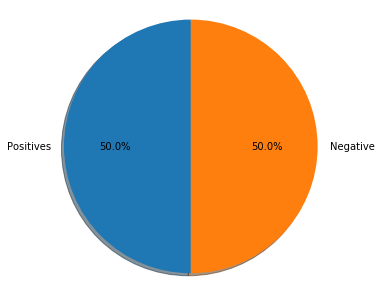

In [4]:
fig = plt.figure(figsize=(5,5))

# labels for the two classes
labels = 'Positives', 'Negative'
# Sizes for each slide
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
plt.pie(x=sizes,labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')

### Looking at raw texts

In [5]:
# prints positive class in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# prints negative class in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

@americascup Do you have stage times for Portsmouth live? :) x
Finally watching the last #TopGear episode, hopefully it won't end :( http://t.co/75IDDesHD0


In [6]:
print('\033[95m'+all_negative_tweets[3])

“@ketchBurning: I hate Japanese call him "bani" :( :(”

Me too


## Preprocessing raw text for Sentiment analysis
#### steps followed:
* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming

In [7]:
# Our selected sample is Complex enough to exemplify each step
tweet = all_positive_tweets[2277]
print('\033[94m'+tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [8]:
#importing libraries for text preprocessing
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [9]:
import re
import string

### Remove hyperlinks,  Twitter marks and styles

Since the dataset is a Twitter dataset, i'd like to remove some substrings commonly used on the platform like the hashtag, retweet marks, and hyperlinks. i'll be using the [re](https://docs.python.org/3/library/re.html) library to perform regular expression operations on our tweet. I defined the search pattern and use the `sub()` method to remove matches by substituting with an empty character (i.e. `''`)

In [10]:
print('\033[92m' + tweet)
print('\033[94m')

# removing old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# removing hyperlinks in between and at the end of tweet
tweet2 = re.sub(r'http\S+', '', tweet2)

# removing hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


### Tokenizing the string

In [11]:
print(' ')
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(reduce_len=True,preserve_case=False,strip_handles=True)
#Tokenize tweet
tweet_tokens = tokenizer.tokenize(tweet2)
print(' ')

print('Tokenized string:')
print(tweet_tokens)

 
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

 
Tokenized string:
[u'my', u'beautiful', u'sunflowers', u'on', u'a', u'sunny', u'friday', u'morning', u'off', u':)', u'sunflowers', u'favourites', u'happy', u'friday', u'off', u'\u2026']


### Removing stop words and punctuations

In [12]:
#Isntantiate the stopwords list
stopwords_english = stopwords.words('english')

In [13]:
print('Stop words\n')
print(stopwords_english)

Stop words

[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u"you're", u"you've", u"you'll", u"you'd", u'your', u'yours', u'yourself', u'yourselves', u'he', u'him', u'his', u'himself', u'she', u"she's", u'her', u'hers', u'herself', u'it', u"it's", u'its', u'itself', u'they', u'them', u'their', u'theirs', u'themselves', u'what', u'which', u'who', u'whom', u'this', u'that', u"that'll", u'these', u'those', u'am', u'is', u'are', u'was', u'were', u'be', u'been', u'being', u'have', u'has', u'had', u'having', u'do', u'does', u'did', u'doing', u'a', u'an', u'the', u'and', u'but', u'if', u'or', u'because', u'as', u'until', u'while', u'of', u'at', u'by', u'for', u'with', u'about', u'against', u'between', u'into', u'through', u'during', u'before', u'after', u'above', u'below', u'to', u'from', u'up', u'down', u'in', u'out', u'on', u'off', u'over', u'under', u'again', u'further', u'then', u'once', u'here', u'there', u'when', u'where', u'why', u'how', u'all', u'any', u'

In [14]:
print('\nPunctuation\n')
print(string.punctuation)


Punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


#### Certain groupings like ':)' and '...' will be retained because they are used to express emotions in tweets. In other contexts however,this might need to be removed.

In [15]:
puncs = ''
for punc in string.punctuation:
    if punc not in '().:':
        puncs += punc
print(puncs)

!"#$%&'*+,-/;<=>?@[\]^_`{|}~


In [16]:
print('')
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



[u'my', u'beautiful', u'sunflowers', u'on', u'a', u'sunny', u'friday', u'morning', u'off', u':)', u'sunflowers', u'favourites', u'happy', u'friday', u'off', u'\u2026']

removed stop words and punctuation:
[u'beautiful', u'sunflowers', u'sunny', u'friday', u'morning', u':)', u'sunflowers', u'favourites', u'happy', u'friday', u'\u2026']


##### We can see that ' :) ' context is retained

### Stemming
Stemming, process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary

In [17]:
print('')
print('\033[92m')
print(tweets_clean)
print('\033[93m')

#Instantiate Stemmer
stemmer = PorterStemmer()
tweets_stem = []

#Convert words to base form
for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)

print('Stem words:')
print(tweets_stem)



[u'beautiful', u'sunflowers', u'sunny', u'friday', u'morning', u':)', u'sunflowers', u'favourites', u'happy', u'friday', u'\u2026']

Stem words:
[u'beauti', u'sunflow', u'sunni', u'friday', u'morn', u':)', u'sunflow', u'favourit', u'happi', u'friday', u'\u2026']


In [18]:
print('\033[92m')
#stemmed tweet
print(' '.join(tweets_stem))


beauti sunflow sunni friday morn :) sunflow favourit happi friday …


###  Defining all steps in a function called process_tweet()

In [19]:
def process_tweet(tweets):
    """
    This function takes a tweet and returns the processed form of the tweet.
    Input:
        Tweet String
    Output:
        clean_tweet
    """
    raw_tweet = tweets
    #removing hyperlinks,hash Tags...
    
    # removing old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '',raw_tweet)
    # removing hyperlinks
    tweet = re.sub(r'http\S+', '', tweet)
    # only removing the hash # sign from the word
    tweet2 = re.sub(r'#', '', tweet)
    #Tokenize tweet
    tokenizer = TweetTokenizer(reduce_len=True,strip_handles=True,preserve_case=False)
    #fit on tweet
    tokenized_tweet = tokenizer.tokenize(tweet2)
    #removing stopwords and punctuation
    punc = [punc for punc in string.punctuation if punc not in '().:']
    stopwords_english = stopwords.words('english')
    stemmer = PorterStemmer()
    clean_tweets = []
    for word in tokenized_tweet:
        #removes stopwords and punctuations
        if(word not in stopwords_english and word not in punc):
            #converts words to base root:
            stem_word = stemmer.stem(word)
            clean_tweets.append(stem_word)
    return clean_tweets

#### Testing function

In [20]:
print('\033[94m'+all_negative_tweets[1])

cleaned_tweet = process_tweet(all_negative_tweets[1])

print('\033[92m'+' '.join(cleaned_tweet))

Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(
everyth kid section ikea cute . shame i'm nearli 19 2 month :(


### We can see that the above clean_tweet has all the neccesary words needed to classify the tweet as negative

# Building and Visualizing word frequencies for each class

### lets build the `build_freqs()` helper function

In [21]:
#Adding all tweets up
tweets = all_negative_tweets + all_positive_tweets
ys = np.append(np.ones(len(all_positive_tweets)), np.zeros(len(all_negative_tweets)))

In [22]:
def build_freqs(tweets,ys):
    ''' 
     Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    '''
    yslist = np.squeeze(ys).tolist()
    freqs = {}
    for y, tweet in zip(yslist,tweets):
        clean_tweet = process_tweet(tweet)
        for word in clean_tweet:
            pair = (word,y)
            freqs[pair] = freqs.get(pair,0) + 1
    return freqs

In [23]:
# word frequency dictionary
freqs = build_freqs(tweets, ys)

### visualizing the output to gain better insights.

## Table of word counts

In [24]:
# i selected some words to appear in the report. i assumed that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

for word in keys:
    
    #initialize postive and negative counts
    pos = 0
    neg = 0
    if (word,1) in freqs:
        pos = freqs[(word,1)]
    if (word,0) in freqs:
        neg = freqs[(word,0)]
    data.append([word,pos,neg])
data

[['happi', 25, 212],
 ['merri', 0, 1],
 ['nice', 19, 99],
 ['good', 101, 238],
 ['bad', 73, 18],
 ['sad', 123, 5],
 ['mad', 11, 4],
 ['best', 22, 65],
 ['pretti', 15, 20],
 ['\xe2\x9d\xa4', 0, 0],
 [':)', 2, 3691],
 [':(', 4584, 1],
 ['\xf0\x9f\x98\x92', 0, 0],
 ['\xf0\x9f\x98\xac', 0, 0],
 ['\xf0\x9f\x98\x84', 0, 0],
 ['\xf0\x9f\x98\x8d', 0, 0],
 ['\xe2\x99\x9b', 0, 0],
 ['song', 27, 22],
 ['idea', 10, 27],
 ['power', 6, 7],
 ['play', 48, 46],
 ['magnific', 0, 2]]

### Visualizing with scatter plot to inspect the table visually. Instead of plotting the raw counts, i will plot it in the logarithmic scale to take into account the wide discrepancies

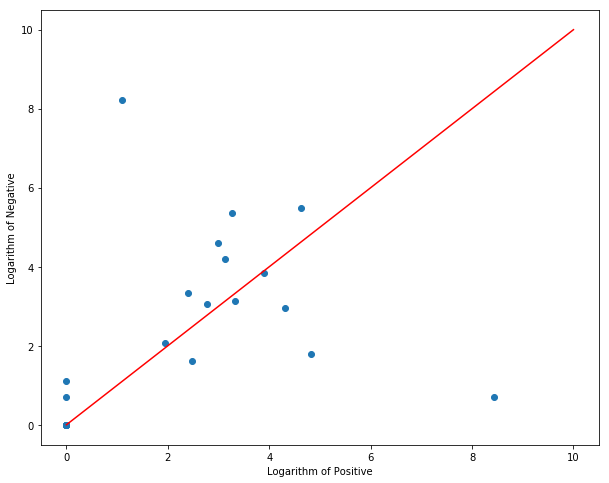

In [25]:
fig,ax = plt.subplots(figsize=(10,8))
x = np.log([x[1] + 1 for x in data])
y = np.log([y[2] + 1 for y in data])

ax.scatter(x,y)
plt.xlabel('Logarithm of Positive')
plt.ylabel('Logarithm of Negative')

# for i in range(0,len(data)):
#     ax.annotate(data[i][0],(x[i],y[i]),fontsize=12)
ax.plot([0,10],[0,10],color='red')

# Extracting Features

## Building a simple helper function to extract features from text

In [26]:
#function helps in extracting useful features from text in 3 dimensional form 
def extract_features(p_tweet,freqs):
    sum_pos = 0
    sum_neg = 0
    for word in p_tweet:
        pos = freqs.get((word,1),0)
        neg = freqs.get((word,0),0)
        sum_pos += pos
        sum_neg += neg
    features = np.array([1,sum_pos,sum_neg]).reshape(1,-1)
    return features   

# Visualizing the tweets on a two dimensional plane

In [27]:
#freq dictionary for all words
freqs = build_freqs(tweets,ys)
#Iniatializing data for extracted features
X = np.zeros((len(tweets),3))
for i in range(len(tweets)):
    clean_tweet = process_tweet(tweets[i])
    X[i,:] = extract_features(clean_tweet,freqs)

In [28]:
#saving data as data frame
import pandas as pd
from os import getcwd
data = np.hstack((X,ys.reshape(-1,1)))
df = pd.DataFrame(data=data,columns=['Bias','Positive','Negative','Sentiment'])
df.head()

,Bias,Positive,Negative,Sentiment
0,1.0,4589.0,2.0,1.0
1,1.0,6199.0,1601.0,1.0
2,1.0,5710.0,1294.0,1.0
3,1.0,9497.0,316.0,1.0
4,1.0,4859.0,306.0,1.0


In [29]:
# df.to_csv(path_or_buf='{}\processed_data'.format(getcwd()+'\\data'),) #save to data directory from current dir

### Split Data For Training and Testing

In [30]:
# splitting the data into two pieces, one for training and one for testing (validation set) 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Sentiment',axis=1), df.Sentiment, test_size=0.2, random_state=42)

## Plot the samples in a scatter plot

Text(0,0.5,'Negative Tweets')

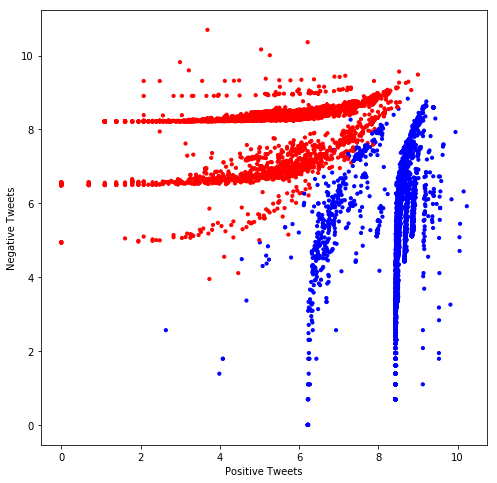

In [31]:
fig,ax = plt.subplots(figsize=(8,8))

colors = ['red','blue']

ax.scatter(np.log([x + 1 for x in X_train.Positive]),np.log([x + 1 for x in X_train.Negative]),c=[colors[int(k)] for k in y_train],marker='o',s=10)
plt.xlabel('Positive Tweets')
plt.ylabel('Negative Tweets')

Text(0,0.5,'Negative Tweets')

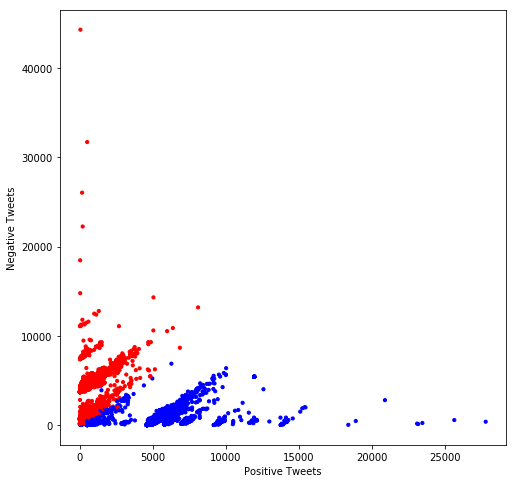

In [32]:
# We can see a clear distinction from the plot above
#Also
fig,ax = plt.subplots(figsize=(8,8))

colors = ['red','blue']

ax.scatter(X_train.Positive,X_train.Negative,c=[colors[int(k)] for k in y_train],marker='o',s=10)
#  Uncomment the next two lines to Zoom in on graph
# ax.set_xlim(0,10000)
# ax.set_ylim(0,10000)
plt.xlabel('Positive Tweets')
plt.ylabel('Negative Tweets')

###### From the plot, it is evident that the features that  was chosen to represent tweets as numerical vectors allow an almost perfect separation between positive and negative tweets. So The Models accuracy might be very high!

# Logistic Regression Model

### Sigmoid Function

In [33]:
def sigmoid(z):
    '''
    Function takes an array as input and return an output between 0 and 1 for each record
    '''
    
    h = 1 /(1 + np.exp(-z))
    return h

In [34]:
# Test the predictions
sigmoid(np.arange(-10,10))

array([4.53978687e-05, 1.23394576e-04, 3.35350130e-04, 9.11051194e-04,
       2.47262316e-03, 6.69285092e-03, 1.79862100e-02, 4.74258732e-02,
       1.19202922e-01, 2.68941421e-01, 5.00000000e-01, 7.31058579e-01,
       8.80797078e-01, 9.52574127e-01, 9.82013790e-01, 9.93307149e-01,
       9.97527377e-01, 9.99088949e-01, 9.99664650e-01, 9.99876605e-01])

### To train the lr model,we need to implement a gradient descent function

#### Implement gradient descent function

In [35]:
def gradient_descent(X,y,theta,alpha,num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    '''
    if type(X) == np.ndarray and type(y) == np.ndarray:
        X_mat = X
        y_vec = y
    else:
        raise ValueError('Parameter X and Y are not of type numpy.ndarray')
    
    X_transpose = X_mat.transpose()
    y_transpose = y_vec.transpose()
    m = len(X)
    for i in range(0,num_iters):
        #get z, the dot product of x and theta
        z = np.dot(X,theta)
        
        #generate Predictions
        h = sigmoid(z)
        
        #Calculate cost
        J_cost = -1 * ((np.dot(y_transpose,np.log(h)) + np.dot((1 - y).transpose(),np.log(1-h)))/m)
        
        #Update Theta
        theta = theta - ((alpha/m) * np.dot(X_transpose,(h-y)))
    
    return theta,float(J_cost)

#### Testing the function

In [36]:
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_theta,tmp_J = gradient_descent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print("The cost after training is {}.".format(round(tmp_J,ndigits=2)))
print("The resulting vector of weights is {}".format([round(t, 8) for t in np.squeeze(tmp_theta)]))

The cost after training is 0.67.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


### Training The Model

In [ ]:
x = X_train.values
y = y_train.values

#Apply gradient descent
theta,cost = gradient_descent(x,y,np.zeros((3,1)),1e-8,1500)
print('The cost after training is {}'.format(round(theta,ndigits=2)))
print('The resulting vector of weights is {}'.format([round(t) for t in theta]))

### Implement `predict_tweet()` to predict tweet's class

In [ ]:
def predict_tweet(tweet,theta,freqs):
    '''
    Input:
        tweet: tweet to predict
        theta:hyperparameter vector or matrix of form (3,1)
        freqs:dictionary of all words
    Output:
        y_pred: tweet's prediction
    '''
    clean_tweet = process_tweet(tweet)
    x = extract_features(clean_tweet,freqs)
    
    #generate predictions
    y_pred = np.dot(x,theta)
    
    return y_pred

In [ ]:
#test function
t_s = ['you  are mean','He is very bad','I love you','The movie ended sadly ;(','he must be depressed']
for t in t_s:
    print('{tweet} -> {pred}'.format(tweet=t,pred=predict_tweet(t,theta,freqs))

### The `test_logistic_model()` function calculates the model accuracy

In [ ]:
def test_logistic_model(test_x,test_y,freqs,theta):
    '''
    Input:
        test_x: Data to generate predicts on
        test_y:Actual values
        freqs:dictionary of all words
        theta: hyperparameter vector or matrix of form (3,1)
    Output:
        accuracy: This the model's accuracy
    '''
    
    m = len(test_y)
    y_hat = []
    for tweet in test_x:
        #generate z for sigmoid func
        z = predict_tweet(tweet,theta,freqs)
        #generate models predictions
        pred = sigmoid(z)
        
        
        if pred > 0:
            y_hat.append(1)
        else:
            y_hat.append(0)
    
    accuracy = (np.squeeze(y_hat) == np.squeeze(test_y))/m
    
    return accuracy

### Print Model's Accuracy

In [ ]:
print("Logistic Regression Model's Accuracy is {}".format(test_logistic_model(test_x,test_y,freqs,theta)))